In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configuración para gráficos
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.grid"] = True


In [2]:
def load_emg(file_path):
    """
    Carga un archivo .mat de LabChart y extrae los canales de Biceps y Triceps.

    Parámetros
    ----------
    file_path : str o Path
        Ruta relativa o absoluta al archivo .mat

    Retorna
    -------
    dict con claves 'Biceps' y 'Triceps' que contienen los arrays de señal
    """
    data = scipy.io.loadmat(file_path)

    # Extraemos la señal principal
    signals = data["data"].squeeze()

    # Extraemos títulos de los canales
    titles = data["titles"].squeeze()

    # Creamos un diccionario con las señales que necesitamos
    result = {}
    for i, title in enumerate(titles):
        if "Biceps" in title or "Triceps" in title:
            start = int(data["datastart"][i, 0]) - 1
            end = int(data["dataend"][i, 0])
            result[title.strip()] = signals[start:end]

    return result


In [3]:
def plot_emg(signals, title="Señales EMG"):
    """
    Grafica señales de Biceps y Triceps desde un diccionario generado por load_emg().
    """
    plt.figure()
    for name, sig in signals.items():
        plt.plot(sig, label=name)
    plt.legend()
    plt.title(title)
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.show()


In [4]:
# =========================================
# Aquí debes agregar las rutas relativas de tus archivos .mat
# Ejemplo: files = ["paciente1_muestra1.mat", "paciente1_muestra2.mat", ...]
# =========================================

files = ["M1_JUAN_VANEGAS.mat", 
         "M1_SARA_MANCO.mat", 
         "M1_LEON_ARBOLEDA.mat",
         'M1_SARA_SALAMANCA.mat',
         'M1_SARA_MARIN.mat',
         'M1_JUAN_GIRALDO.mat',
         'M1_CAMILA_ROA.mat'
    # "ruta/relativa/paciente1_muestra1.mat",
    # "ruta/relativa/paciente1_muestra2.mat",
    # "ruta/relativa/paciente1_muestra3.mat",
    # ...
]


In [5]:
def plot_emg(signals, title="Señales EMG"):
    """
    Grafica señales de Biceps y Triceps en subplots separados con colores fijos.
    """
    colors = {"Biceps": "blue", "Triceps": "red"}  # colores asignados
    
    fig, axes = plt.subplots(len(signals), 1, figsize=(12, 6), sharex=True)

    for ax, (name, sig) in zip(axes, signals.items()):
        ax.plot(sig, color=colors.get(name, "black"))  # usa azul o rojo según canal
        ax.set_title(f"{title} - {name}")
        ax.set_ylabel("Amplitud")
        ax.grid(True)

    axes[-1].set_xlabel("Muestras")
    plt.tight_layout()
    plt.show()



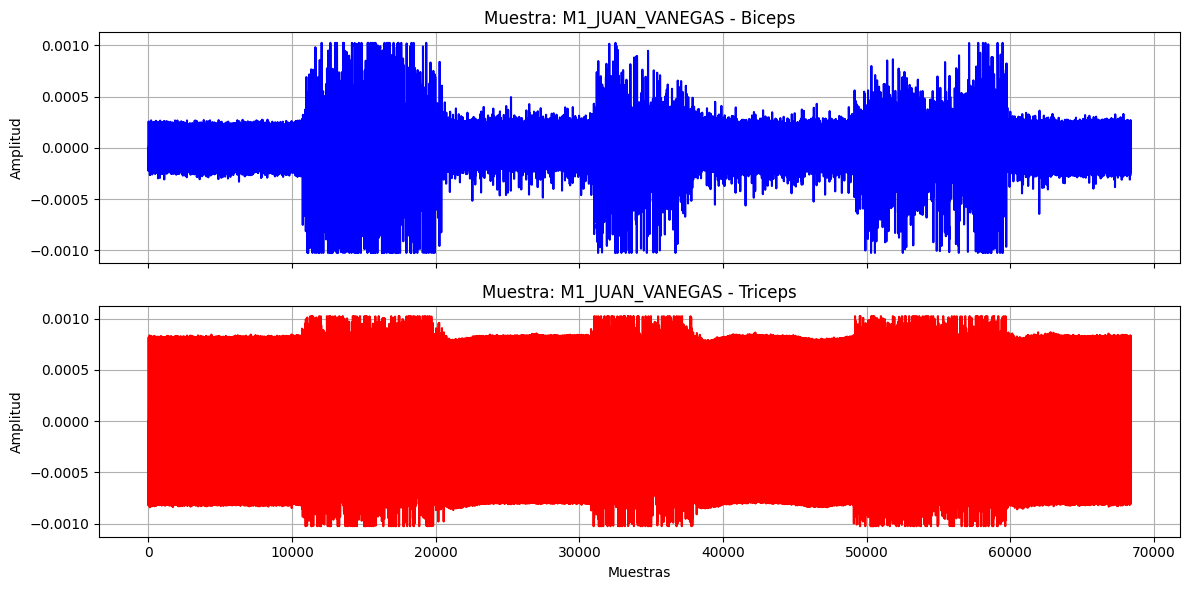

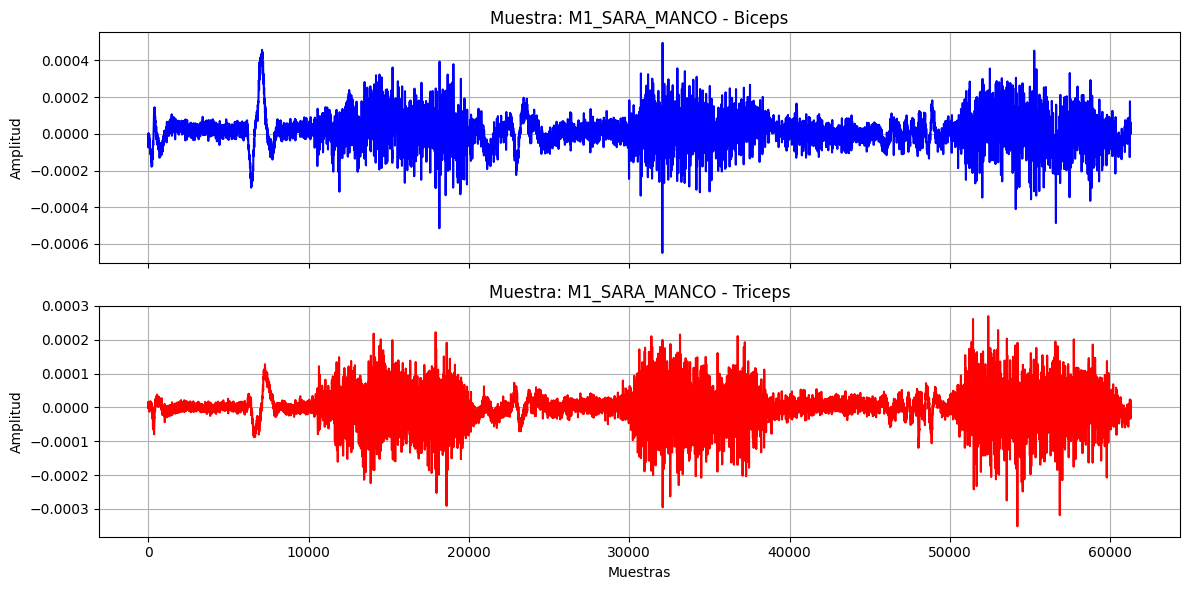

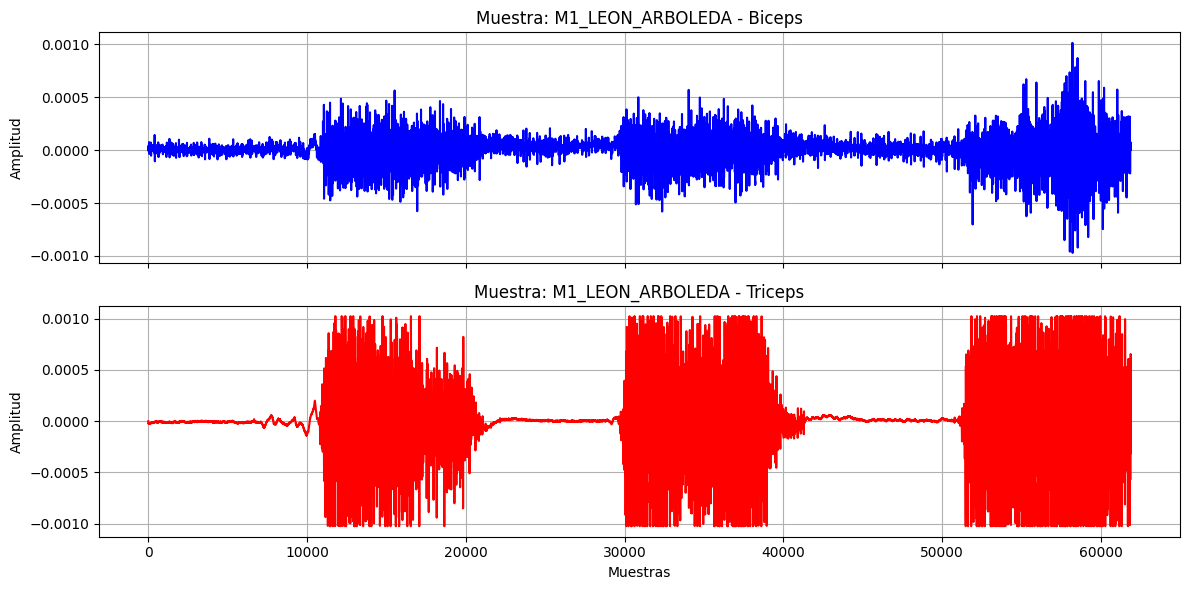

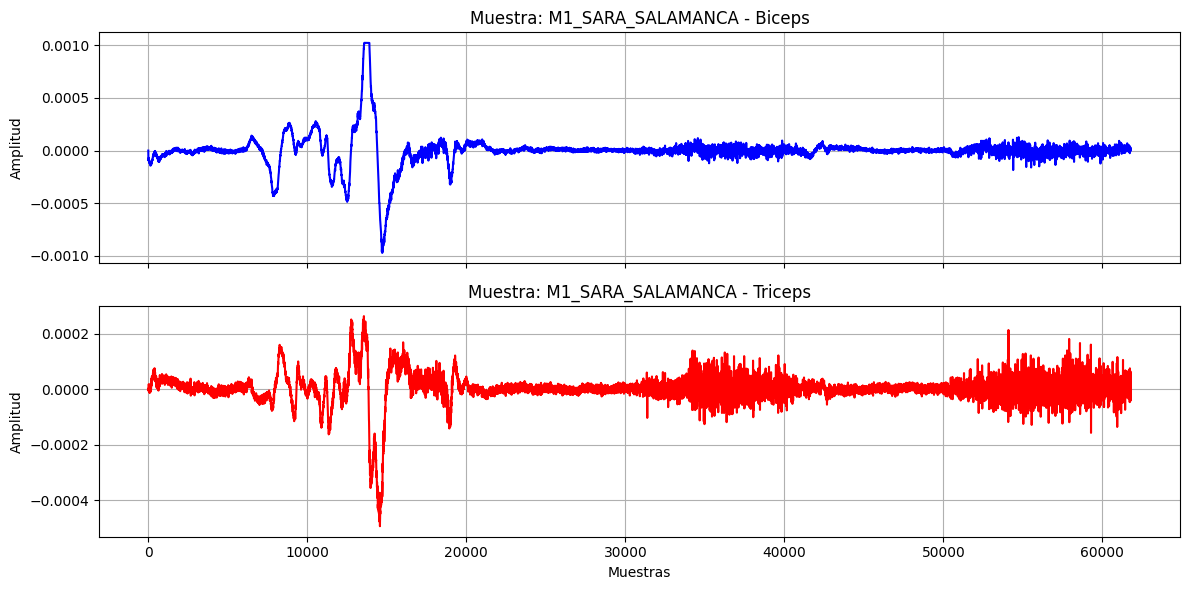

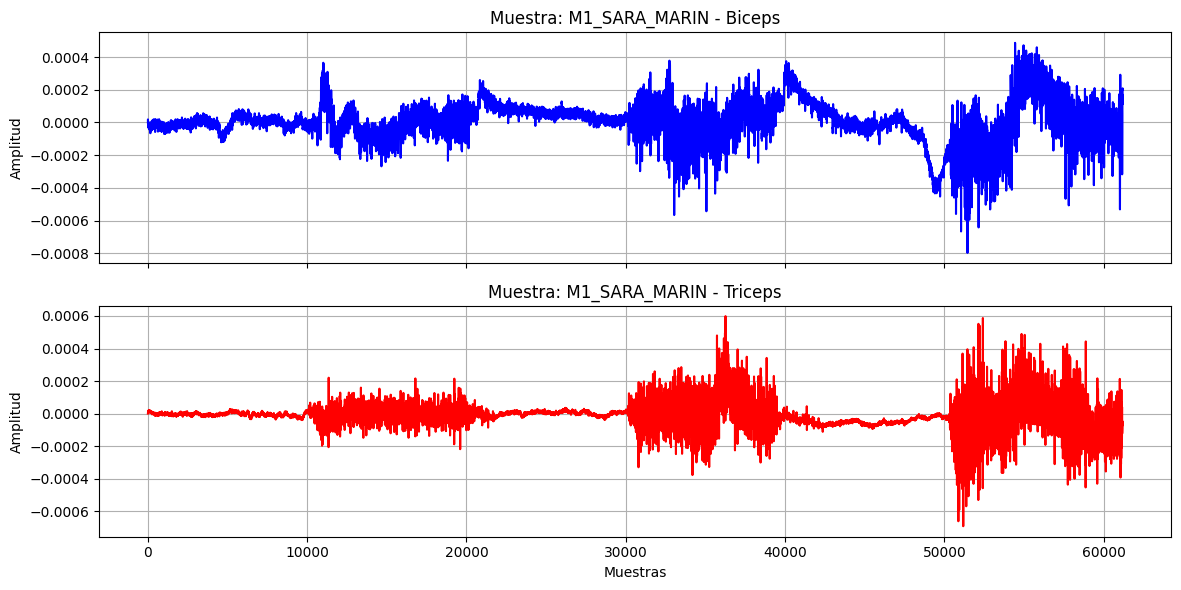

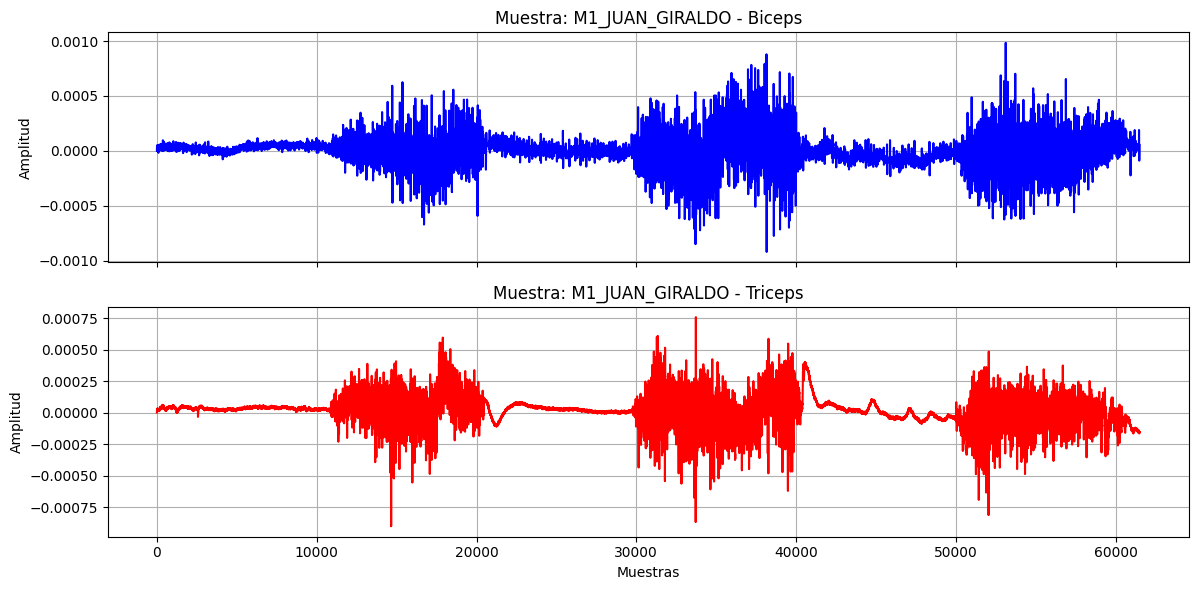

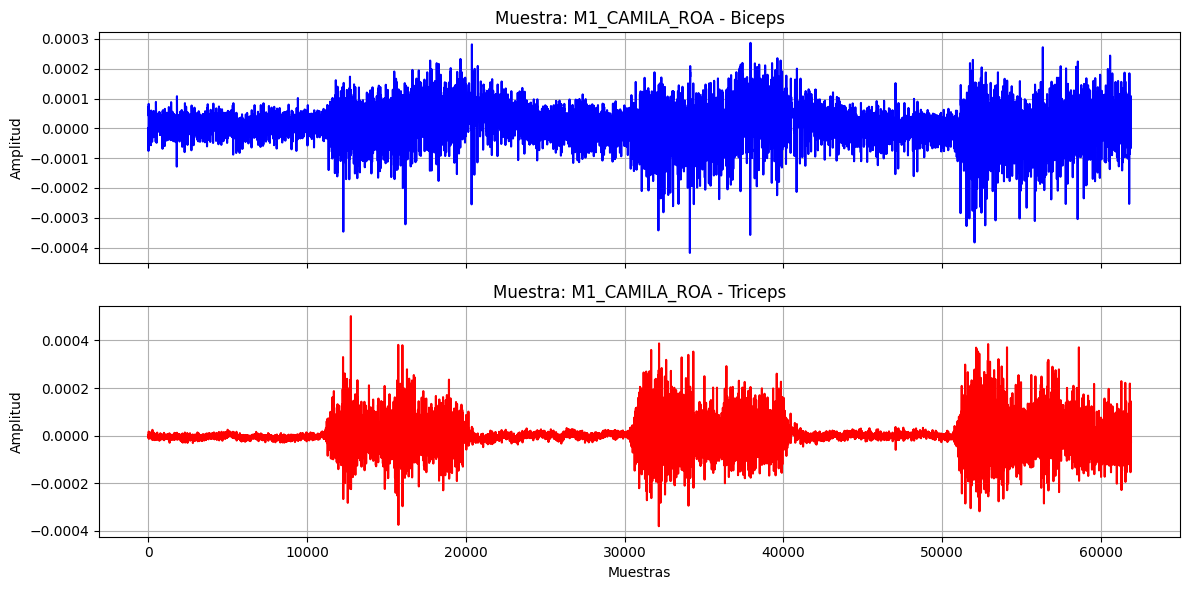

Procesamiento terminado. Se han cargado 7 muestras.


In [6]:
dataset = {}  # Diccionario donde guardaremos todas las señales

for file in files:
    file_path = Path(file)
    sample_name = file_path.stem  # nombre sin extensión

    # Cargar señales
    signals = load_emg(file_path)

    # Guardar en dataset
    dataset[sample_name] = signals

    # Graficar señales
    plot_emg(signals, title=f"Muestra: {sample_name}")

print("Procesamiento terminado. Se han cargado", len(dataset), "muestras.")

In [ ]:
# Guardar dataset completo como archivo .npz para reutilizarlo fácilmente
# np.savez("dataset_emg.npz", **dataset)
